In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("MachineLearningRating_v3.txt", delimiter='|')

# Standardize column names
df.columns = df.columns.str.strip().str.lower()

# Derive additional columns
df['claim_occurred'] = df['totalclaims'].apply(lambda x: 1 if x > 0 else 0)
df['margin'] = df['totalpremium'] - df['totalclaims']
df['loss_ratio'] = df['totalclaims'] / df['totalpremium'].replace(0, np.nan)


C:\Users\Abigya\AppData\Local\Temp\ipykernel_20304\4061680672.py:8: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("MachineLearningRating_v3.txt", delimiter='|')


In [2]:
# ANOVA: Loss ratio across provinces
anova_data = df[['province', 'loss_ratio']].dropna()
groups = [g['loss_ratio'].values for name, g in anova_data.groupby('province') if len(g) > 30]

f_stat, p_value = stats.f_oneway(*groups)
print(f"H1 - Province Risk Difference\nF-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")


H1 - Province Risk Difference
F-statistic: 4.989, p-value: 0.000


In [3]:
# Select top 2 zip codes for comparison
top_zipcodes = df['postalcode'].value_counts().head(2).index.tolist()
zip_df = df[df['postalcode'].isin(top_zipcodes)]

group1 = zip_df[zip_df['postalcode'] == top_zipcodes[0]]['claim_occurred']
group2 = zip_df[zip_df['postalcode'] == top_zipcodes[1]]['claim_occurred']

z_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
print(f"H2 - Zip Code Risk Difference\nT-statistic: {z_stat:.3f}, p-value: {p_val:.3f}")


H2 - Zip Code Risk Difference
T-statistic: -1.870, p-value: 0.062


In [4]:
group1_margin = zip_df[zip_df['postalcode'] == top_zipcodes[0]]['margin']
group2_margin = zip_df[zip_df['postalcode'] == top_zipcodes[1]]['margin']

t_stat, p_margin = stats.ttest_ind(group1_margin, group2_margin, equal_var=False)
print(f"H3 - Zip Code Margin Difference\nT-statistic: {t_stat:.3f}, p-value: {p_margin:.3f}")


H3 - Zip Code Margin Difference
T-statistic: 1.164, p-value: 0.244


In [5]:
group_female = df[df['gender'].str.lower() == 'female']['claim_occurred']
group_male = df[df['gender'].str.lower() == 'male']['claim_occurred']

z_gender, p_gender = stats.ttest_ind(group_female, group_male, equal_var=False)
print(f"H4 - Gender Risk Difference\nT-statistic: {z_gender:.3f}, p-value: {p_gender:.3f}")


H4 - Gender Risk Difference
T-statistic: -0.205, p-value: 0.837


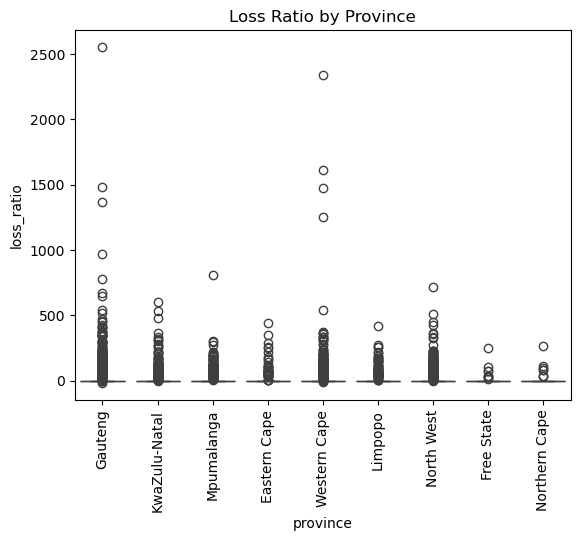

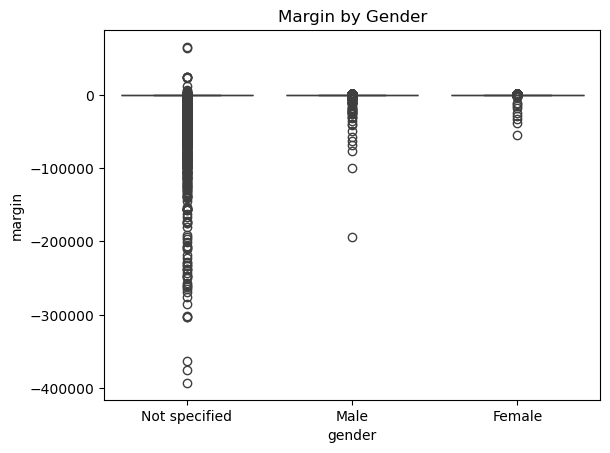

In [6]:
# Boxplot of Loss Ratio by Province
sns.boxplot(x='province', y='loss_ratio', data=df)
plt.title("Loss Ratio by Province")
plt.xticks(rotation=90)
plt.show()

# Boxplot of Margin by Gender
sns.boxplot(x='gender', y='margin', data=df)
plt.title("Margin by Gender")
plt.show()
